In [1]:
!. run_sixte.sh
from xspec import *
import os
Xset.chatter = 0
Xset.abund = 'wilm'

Initialize Heasoft
Done


In [6]:
AllData.clear()
os.chdir('/home/suro/Desktop/github_repos/SIXTE')
os.chdir('data')
Plot.device = '/svg'
Plot.xAxis = 'keV'
Xset.chatter = 0
data = Spectrum('combined_spec.pha')
data.ignore("**-0.2 2.0-**")

In [16]:
AllModels.clear()
Xset.abund = 'wilm'
model = Model("tbabs*bbodyrad")
model.TBabs.nH = 4e-3
model.TBabs.nH.frozen = True
model.bbodyrad.kT = 64e-3
Xset.chatter = 10
Fit.query = 'Y'

Fit.perform()
model.show()


 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).

Model TBabs<1>*bbodyrad<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbodyrad   kT         keV      3.00000      +/-  0.0          
   3    2   bbodyrad   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared                18037.18     using 254 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1

Test statistic : Chi-Squared                18037.18     using 254 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.00e+00 with 251 degree

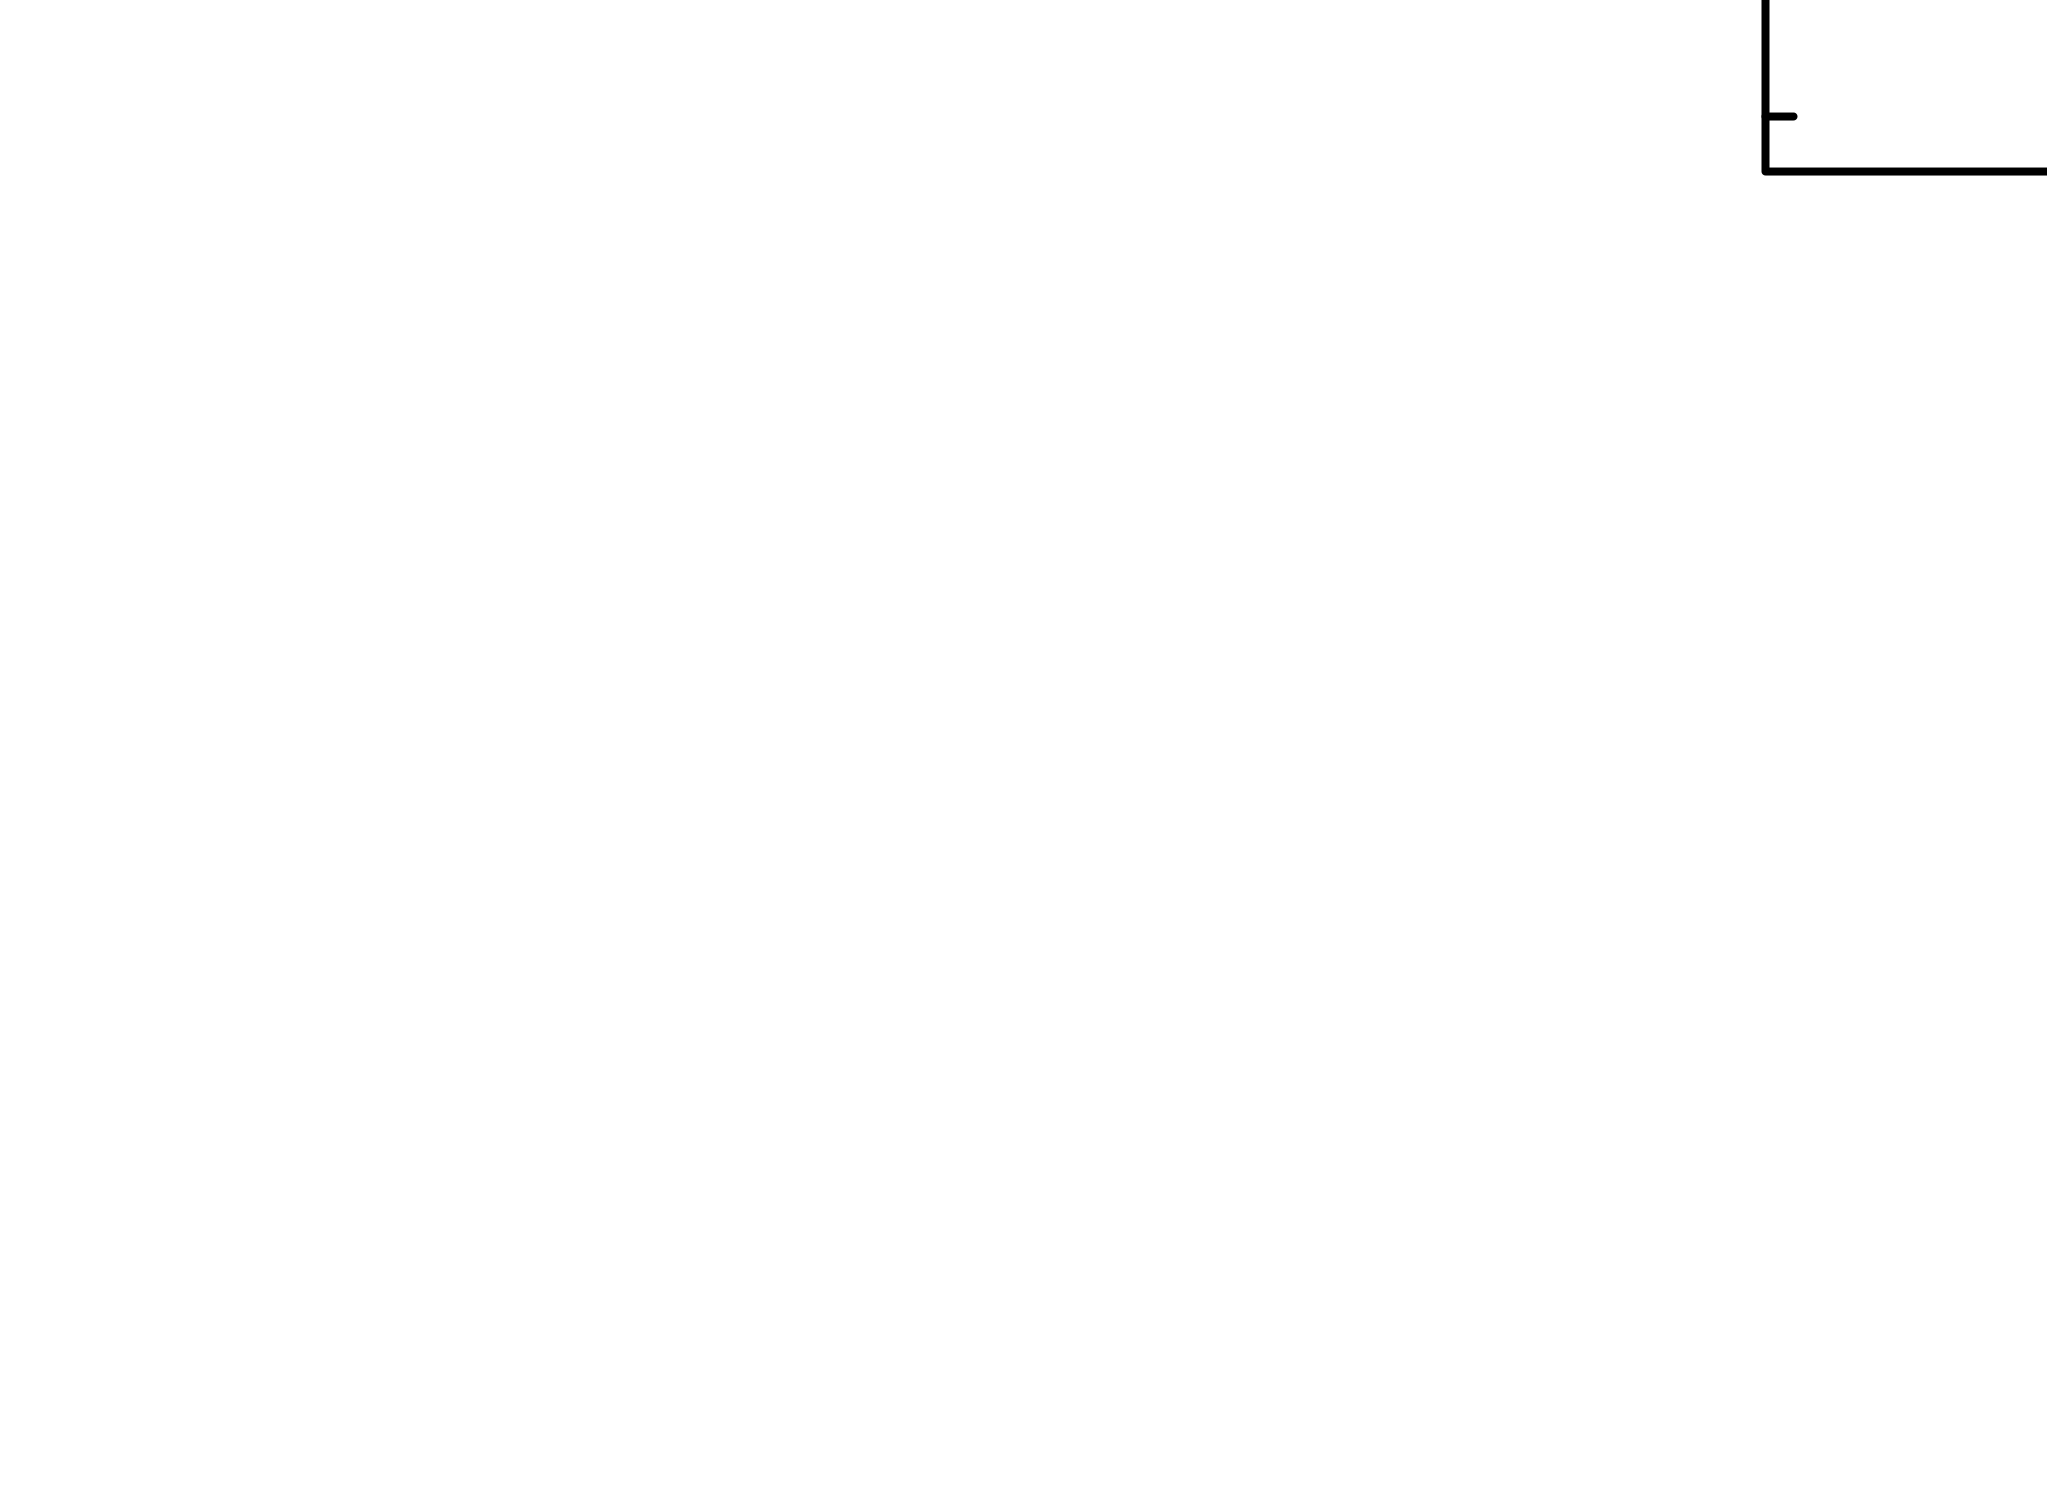

In [17]:
Plot('lda delchi')

In [5]:
from xspec import *
import os
AllModels.clear()
AllData.clear()
os.chdir('/home/suro/mnt/spandau/autoM7_reduced_pattern1/720000_1RXSJ160518.8+32490/spec')
s = Spectrum('RXJ1605_020_SourceSpec_00001_c030_grp.fits')
s.ignore("**-0.2 2.0-**")



1 spectrum  in use
 
Spectral Data File: RXJ1605_020_SourceSpec_00001_c030_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.272e+00 +/- 9.798e-03 (98.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-324
  Telescope: eROSITA Instrument: MERGED  Channel Type: PI
  Exposure Time: 3.475e+04 sec
 Using fit statistic: chi
 Using Background File                RXJ1605_020_BackgrSpec_00001_c030.fits
  Background Exposure Time: 3.475e+04 sec
 Using Response (RMF) File            RXJ1605_020_RMF_00001_c030.fits for Source 1
 Using Auxiliary Response (ARF) File  RXJ1605_020_ARF_00001_c030.fits

     1 channels (1) ignored in spectrum #     1
   149 channels (176-324) ignored in spectrum #     1



In [7]:
import astropy.units as u
import numpy
dist = 400*u.pc
d = dist.to(10*u.kpc).value
norm = (11*u.km)**2/(d**2)
norm


<Quantity 75625. km2>

In [8]:
import astropy.units as u
import numpy
dist = 400*u.pc
d = dist.to(10*u.kpc).value
norm = (0.6*u.km)**2/(d**2)
norm

<Quantity 225. km2>


1 spectrum  in use
 
Spectral Data File: RXJ1605_020_SourceSpec_00001_c030_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.272e+00 +/- 9.798e-03 (98.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-324
  Telescope: eROSITA Instrument: MERGED  Channel Type: PI
  Exposure Time: 3.475e+04 sec
 Using fit statistic: chi
 Using Background File                RXJ1605_020_BackgrSpec_00001_c030.fits
  Background Exposure Time: 3.475e+04 sec
 Using Response (RMF) File            RXJ1605_020_RMF_00001_c030.fits for Source 1
 Using Auxiliary Response (ARF) File  RXJ1605_020_ARF_00001_c030.fits

     1 channels (1) ignored in spectrum #     1
   149 channels (176-324) ignored in spectrum #     1

 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).

Model TBabs<1>(bbodyrad<2> + bbodyrad<3>) Source No.: 1   Active/On
Model Model Component  Parame

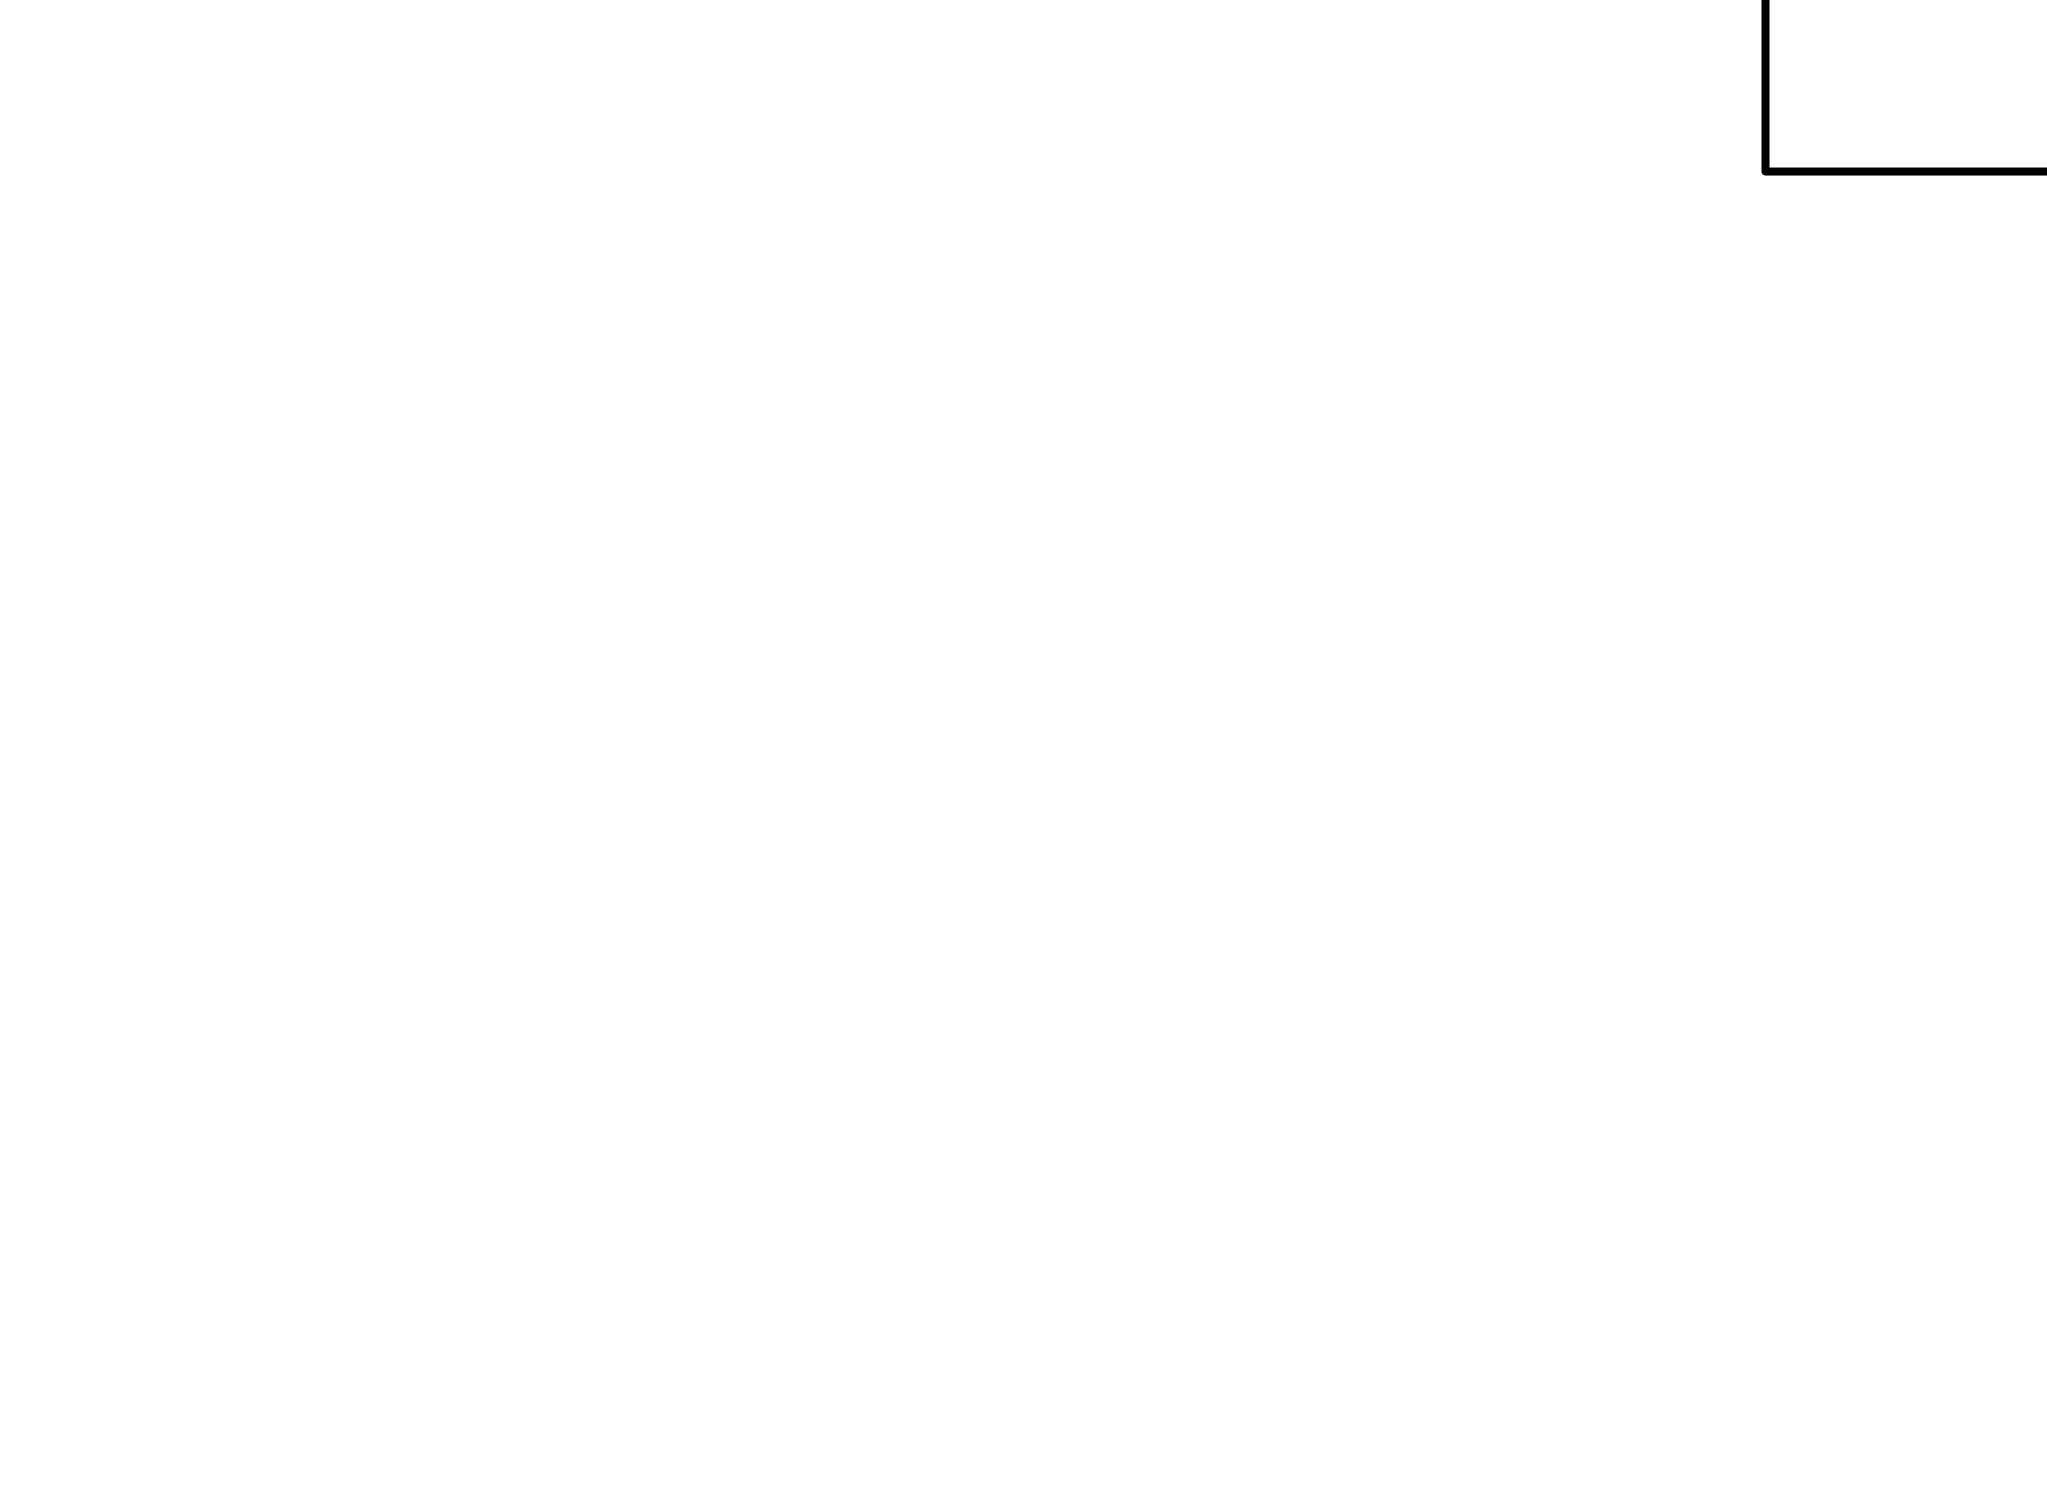

In [9]:
from xspec import *
import os
AllModels.clear()
AllData.clear()
Xset.chatter = 10

os.chdir('/home/suro/mnt/spandau/autoM7_reduced_pattern1/720000_1RXSJ160518.8+32490/spec')
s = Spectrum('RXJ1605_020_SourceSpec_00001_c030_grp.fits')
s.ignore("**-0.2 2.0-**")
Plot.device = '/svg'
Plot.xAxis = 'keV'
AllModels.clear()
Xset.abund = 'wilm'
model = Model("tbabs*(bbodyrad+bbodyrad)")
model.TBabs.nH = [1e-2, 0.01, 1e-3, 1e-2, 1, 1] #val, step, Elow, Emin, Emx, Eup
# model.TBabs.nH.frozen = True
# model.bbodyrad.kT = [55e-3, 0.01, 1e-3, 1e-2, 1, 1]
model.bbodyrad.kT = 60e-3
model.bbodyrad.norm = 7e4
model.bbodyrad_3.norm = 200

Fit.query = 'Y'
Fit.perform()

Plot('lda delchi')



In [21]:
Fit.statistic/Fit.dof

2.1592658688393582